In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
try:
    %tensorflow_version 2.x
except:
    pass

In [4]:
!pip install pythainlp
!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/00/ce/ebf70bb24f220c628d4ce1e153c07e95f59132a1d882b586427ade2b1b3d/epitran-1.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/20/95/d23071d0992dabcb61c948fb118a90683193befc88c23e745b050a29e7db/marisa-trie-0.7.5.tar.gz
  Running setup.py clean for marisa-trie
Failed to build marisa-trie
  Running setup.py install for marisa-trie: started
    Running setup.py install for marisa-trie: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\chinn\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\chinn\\AppData\\Local\\Temp\\pip-install-hx4x_hdc\\marisa-trie\\setup.py'"'"'; __file__='"'"'C:\\Users\\chinn\\AppData\\Local\\Temp\\pip-install-hx4x_hdc\\marisa-trie\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\chinn\AppData\Local\Temp\pip-wheel-lh_aok9j' --python-tag cp37
       cwd: C:\Users\chinn\AppData\Local\Temp\pip-install-hx4x_hdc\marisa-trie\
  Complete output (5 lines):
  running bdist_wheel
  running build
  running build_clib
  building 'libmarisa-trie' library
  error: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": https://visualstudio.microsoft.com/downloads/
  ----------------------------------------
  ERROR: F

  Using cached https://files.pythonhosted.org/packages/f6/56/4ab7204bde7468be65d047578192975035d9bc4e786990a407a28a8f75b8/attacut-1.0.6-py3-none-any.whl


  ERROR: Could not find a version that satisfies the requirement torch>=1.2.0 (from attacut) (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
ERROR: No matching distribution found for torch>=1.2.0 (from attacut)


In [5]:
import pythainlp
from pythainlp import sent_tokenize, word_tokenize,subword_tokenize
from collections import Counter
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
import matplotlib.pyplot as plt 
from itertools import islice
import altair as alt
from PIL import Image

In [6]:
url ="https://github.com/chinnapaht/Goverment-Distrust-Debate/blob/master/PJ%20info%20visual_day.xlsx?raw=true"
df24 = pd.read_excel(url,sheet_name="24.02")
df25 = pd.read_excel(url,sheet_name="25.02")
df26 = pd.read_excel(url,sheet_name="26.02")
df27 = pd.read_excel(url,sheet_name="27.02")

In [7]:
df24["Day"] =["24/02/2020" for i in range(len(df24))]
df25["Day"] =["25/02/2020" for i in range(len(df25))]
df26["Day"] =["26/02/2020" for i in range(len(df26))]
df27["Day"] =["27/02/2020" for i in range(len(df27))]
all_4_days=pd.concat([df24,df25,df26,df27])
all_4_days

,ชื่อ-นามสกุล,เวลาเริ่ม(hh:mm:ss),เวลาจบ(hh:mm:ss),ประเภทการอภิปราย,Duration,เนื้อหา,Count,ฝ่าย,Day
0,ชวน หลีกภัย,00:04:57,00:16:05,บริหารสภา,00:11:08,ท่านสมาชิกที่เคารพครับ ขณะนี้มีสมาชิกมาลงชื่อแ...,137,ประธานสภา,24/02/2020
1,วิรัช รัตนเศรษฐ,00:16:00,00:17:00,อภิปราย,00:01:00,ท่านประธานที่เคารพกระผมนายวิรัช รัตนเศรษฐ สมาช...,2,พรรคร่วมรัฐบาล,24/02/2020
2,ชวน หลีกภัย,00:17:00,00:18:31,บริหารสภา,00:01:31,ครับ สำหรับเรื่องเวลานะครับ สภาได้ออกระเบียบวา...,137,ประธานสภา,24/02/2020
3,สมพงษ์ อมรวิวัฒน์,00:18:34,00:21:00,อภิปราย,00:02:26,กราบเรียนท่านประธานสภาที่เคารพ ท่านสมาชิกผู้มี...,2,พรรคฝ่ายค้าน,24/02/2020
4,ชวน หลีกภัย,00:21:00,00:21:04,บริหารสภา,00:00:04,ท่านสมพงษ์ตกคำว่าไม่ไปเลยนะครับ,137,ประธานสภา,24/02/2020
...,...,...,...,...,...,...,...,...,...
218,ศุภชัย โพธิ์สุ,09:23:53,09:24:18,บริหารสภา,00:00:25,หลายครั้งแล้วครับ ท่านนี่โจมตีประธานตลอดว่าไม่...,29,รองประธานสภา,27/02/2020
219,จุลพันธ์ อมรวิวัฒน์,09:24:18,09:24:29,หารือ,00:00:11,ท่านประธานที่เคารพกระผมจุลพันธ์ อมรวิวัฒน์ เพื...,5,พรรคฝ่ายค้าน,27/02/2020
220,ศุภชัย โพธิ์สุ,09:24:29,09:24:49,บริหารสภา,00:00:20,ผู้รับรองถูกต้องนะครับ ท่านสมาชิกครับ ก็มีท่าน...,29,รองประธานสภา,27/02/2020
221,ครูมานิตย์ สังข์พุ่ม,09:24:49,09:25:53,หารือ,00:01:04,ผมยกมือมานานแล้วท่านประธาน จริงๆ ถ้าท่านประธาน...,3,พรรคฝ่ายค้าน,27/02/2020


# Select the data and cut the word by name

In [8]:
def cut_n_dict(name,n):
    all_4_days1=all_4_days[all_4_days["ชื่อ-นามสกุล"]==name]
    alltext=[all_4_days1.iloc[i]["เนื้อหา"] for i in range(len(all_4_days1))]
    alltext= " ".join(alltext)
    summarize=dict(Counter(word_tokenize(alltext, keep_whitespace=False)))
    
    removelist=["ครับ","เนี่ย","นะ","ผม","ที่","ก็","และ","การ","นี้","ท่าน","ไม่","ไป","ประธาน","มี","จะ","ใน","ของ","เป็น","กับ","ได้","ว่า","แล้ว","นั้น","นี่","เลย",'พ.ร.บ.',"2","ๆ","บอ","ให้","บอ","ธรรม","นัส","ส"]
    for i in removelist:
        if i not in summarize:
            continue
        else:
            del summarize[i]
    summarize={k: v for k, v in sorted(summarize.items(), key=lambda item: item[1],reverse=True)[:n]}
    return summarize
x1=cut_n_dict("ยุทธพงศ์ จรัสเสถียร",50)
x2=cut_n_dict("วิโรจน์ ลักขณาอดิศร",50)
x3=cut_n_dict("ธีรัจชัย พันธุมาศ",50)
x4=cut_n_dict("ศรัณย์วุฒิ ศรัณย์เกตุ",50)
prayuth=cut_n_dict("ประยุทธ์ จันทร์โอชา",500)
pom=cut_n_dict("ประวิตร วงษ์สุวรรณ",500)
tum=cut_n_dict("ธรรมนัส พรหมเผ่า",500)
don=cut_n_dict("ดอน ปรมัตถ์วินัย",500)
vit=cut_n_dict("วิษณุ เครืองาม",500)


In [10]:
'''
def cut_n_dict(day,n):
    all_4_days1=all_4_days[all_4_days["Day"]==day]
    alltext=[all_4_days1.iloc[i]["เนื้อหา"] for i in range(len(all_4_days1))]
    alltext= " ".join(alltext)
    summarize=dict(Counter(word_tokenize(alltext, keep_whitespace=False)))
    removelist=["ครับ","เนี่ย","นะ","ผม","ที่","ก็","และ","การ","นี้","ท่าน","ไม่","ไป","ประธาน","มี","จะ","ใน","ของ","เป็น","กับ","ได้","2","3","ว่า","แล้ว","นั้น","นี่","เลย","แล้ว"]
    for i in removelist:
        if i not in summarize:
            continue
        else:
            del summarize[i]
    summarize={k: v for k, v in sorted(summarize.items(), key=lambda item: item[1],reverse=True)[:n]}
    return summarize
d1=cut_n_dict("24/02/2020",50)
d2=cut_n_dict("25/02/2020",50)
d3=cut_n_dict("26/02/2020",50)
d4=cut_n_dict("27/02/2020",50)
'''

# Create the Cloud

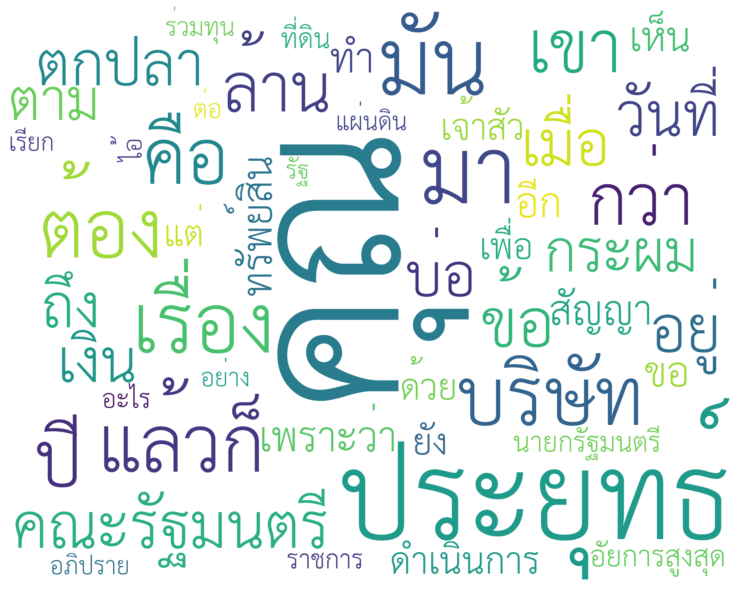

In [29]:
path = r'C:\Users\chinn\OneDrive\Desktop\อภิปรายไม่ไว้วางใจ\THSarabunNew.ttf'
regexp = r"[ก-๙a-zA-Z']+"
def create_cloud(dic):
    textlist=[]
    for k,v in dic.items():
        for j in range(v):
            textlist.append(k)
    text=" ".join(textlist)
    wordcloud = WordCloud(font_path=path,
                      background_color="white",
                      width=2500,
                      height=2000,
                      collocations=False,
                      regexp=regexp
                     ).generate(text)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(r'C:\Users\chinn\OneDrive\Desktop\BUS ENG COREP\x.png')
    plt.show()
create_cloud(x1)

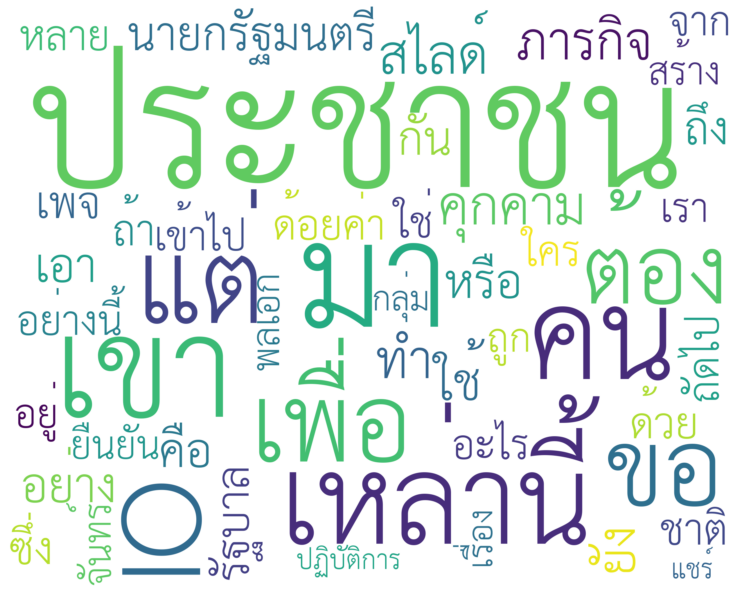

In [30]:
create_cloud(x2)  

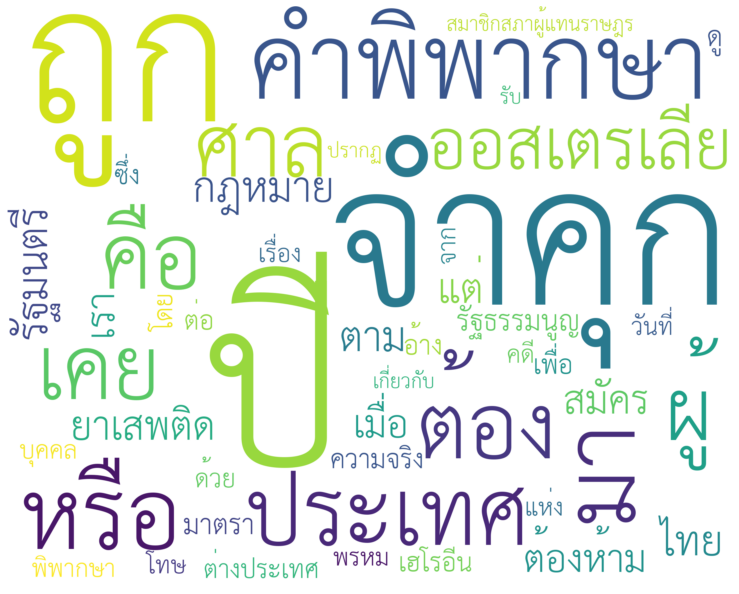

In [34]:
create_cloud(x3)

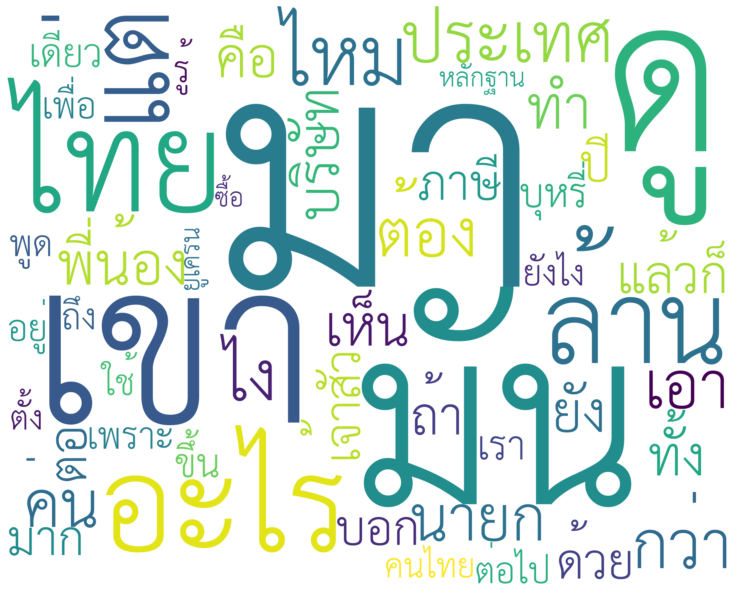

In [32]:
create_cloud(x4)

# Create Cloud by Image

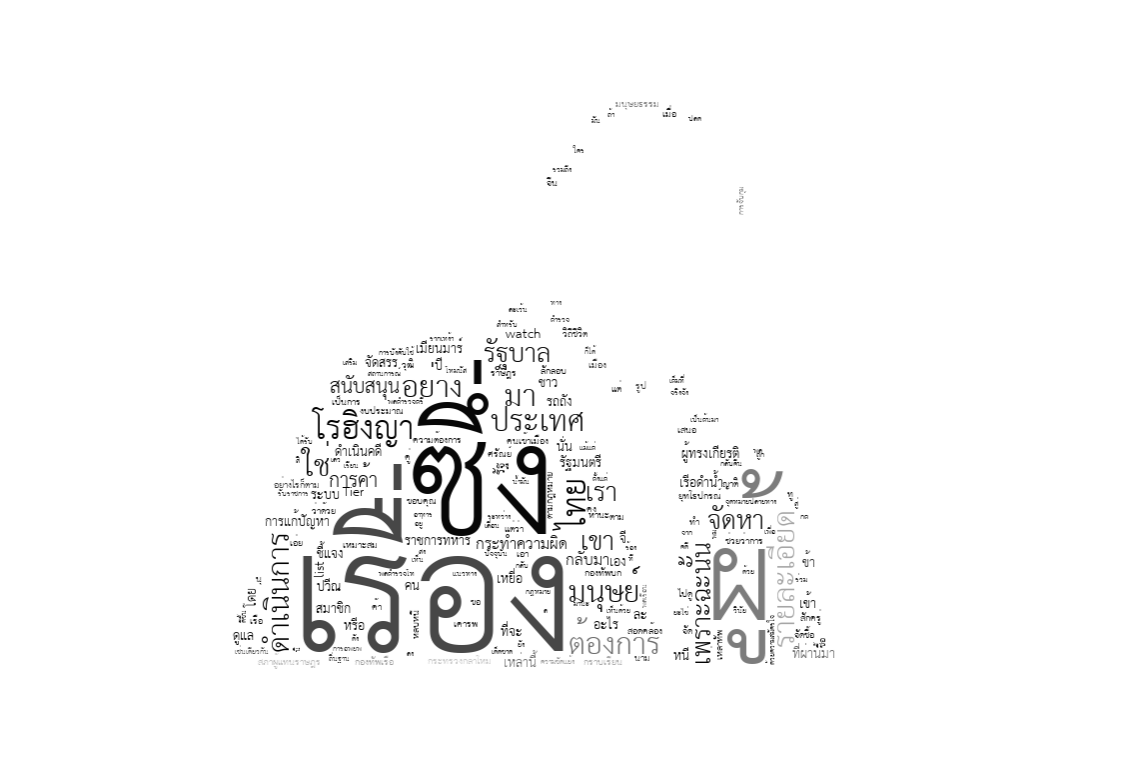

In [16]:
mask = np.array(Image.open(r"C:\Users\chinn\OneDrive\Desktop\New folder (2)\pom.jpg"))
path = r'C:\Users\chinn\OneDrive\Desktop\อภิปรายไม่ไว้วางใจ\THSarabunNew.ttf'
regexp = r"[ก-๙a-zA-Z']+"
def image_create(dic,mask):
    textlist=[]
    for k,v in dic.items():
        for j in range(v):
            textlist.append(k)
    text=" ".join(textlist)
    wordcloud = WordCloud(
                      font_path=path, 
                      background_color="white",
                      width=2500,
                      height=2000,
                      mask=mask,
                    #   contour_width=3, 
                    #   contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      ).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[20,20])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(r'C:\Users\chinn\OneDrive\Desktop\BUS ENG COREP\x.png')
image_create(pom,mask)

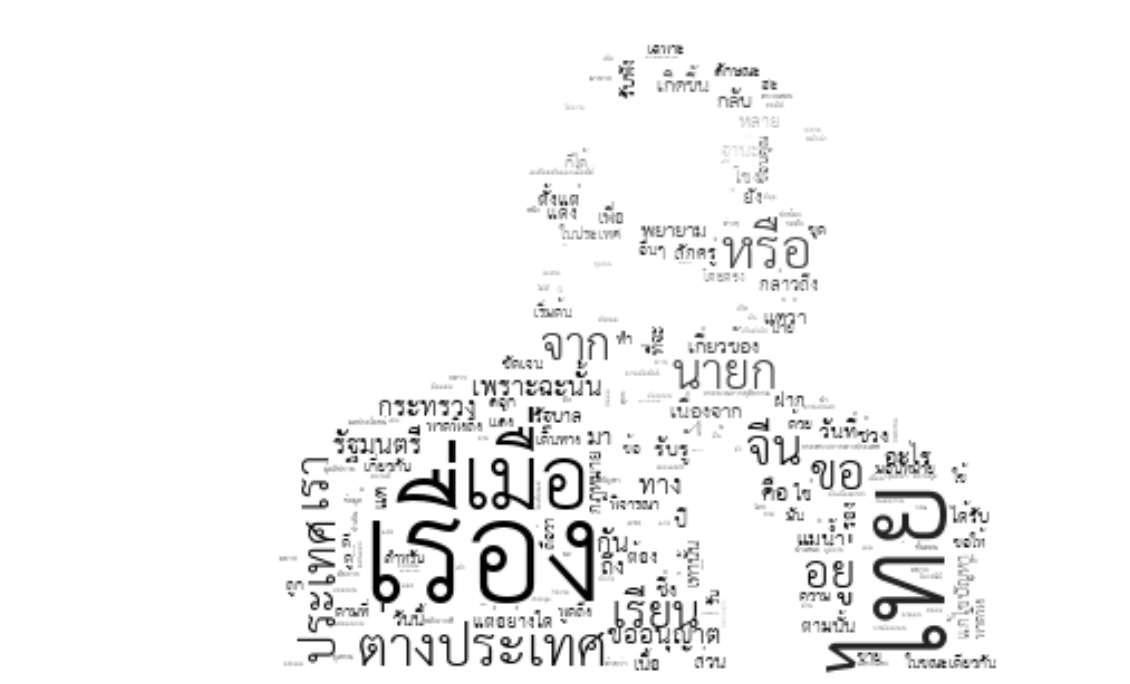

In [17]:
mask = np.array(Image.open(r"C:\Users\chinn\OneDrive\Desktop\New folder (2)\don.jpg"))
image_create(don,mask)

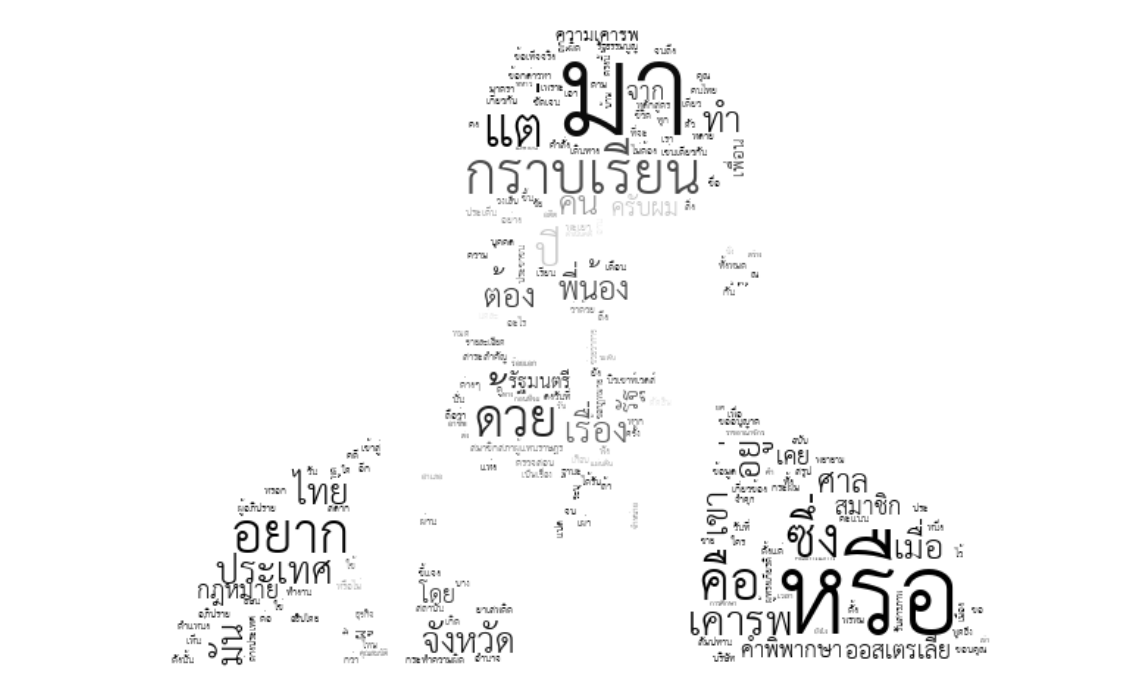

In [18]:
mask = np.array(Image.open(r"C:\Users\chinn\OneDrive\Desktop\New folder (2)\tum.jpg"))
image_create(tum,mask)

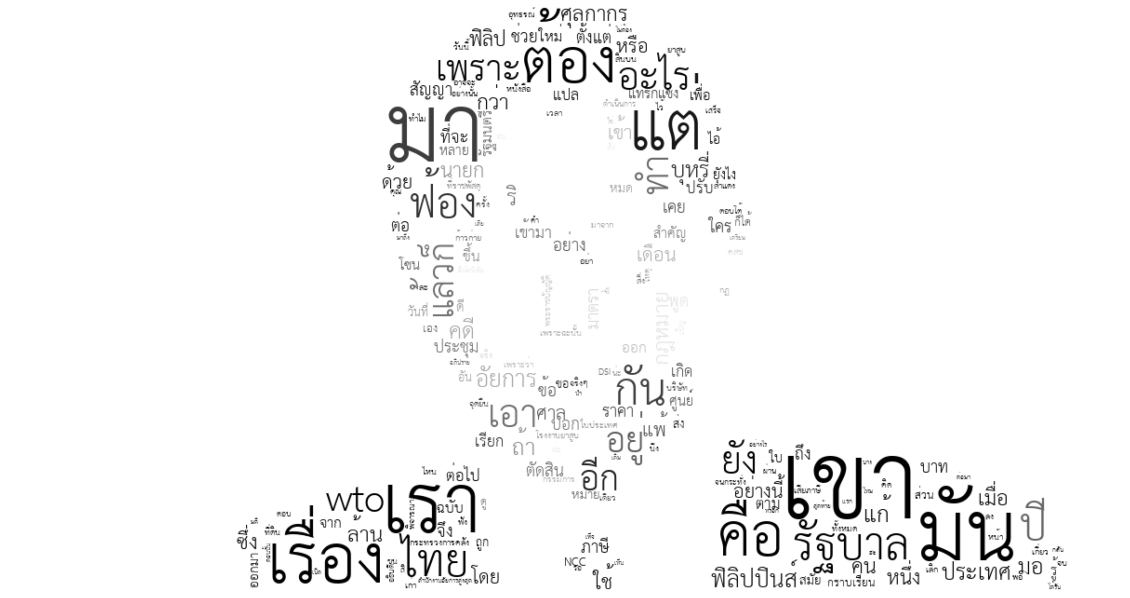

In [19]:
mask = np.array(Image.open(r"C:\Users\chinn\OneDrive\Desktop\New folder (2)\vit2.jpg"))
image_create(vit,mask)

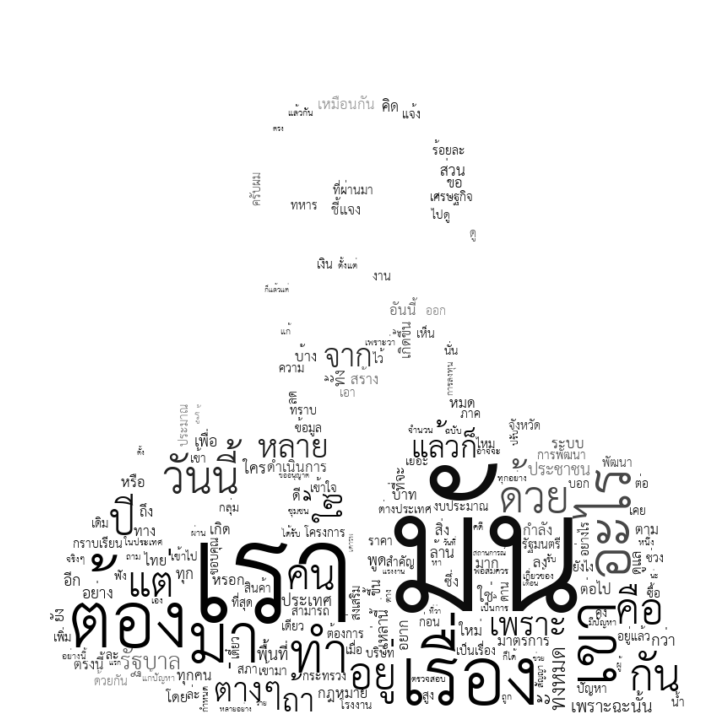

In [51]:
mask = np.array(Image.open(r"C:\Users\chinn\OneDrive\Desktop\New folder (2)\yuth.jpg"))
image_create(prayuth,mask)